# My first Code

# Use python
# python can be programe in
 -as a structerd langugae
 -as a object oriented language(by define class,constarctor ,object,extractra)

 ## mostly we use the jupyter lab

In [1]:
y=2;
x=6;
y=x+y;
print (y);

8


# Strat the Mashin learning 

## By an simple example 
### throught the example we will:
  -look at the big picture the big picture
  -how to get the data 
  -discover and vissualized data-->

## please import real data
## there some data in clude the 


# In this class, we will use the California Housing Prices from the StatLib repository 

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_PATH)
print(HOUSING_URL)

datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [4]:
def fetch_housing_data(HOUSING_URL1, HOUSING_PATH1):
    housing_url=HOUSING_URL1
    housing_path=HOUSING_PATH1 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    print(tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

datasets\housing\housing.tgz


In [7]:
housing = load_housing_data(HOUSING_PATH)  # housing variable here is a "pandaas data frame"

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


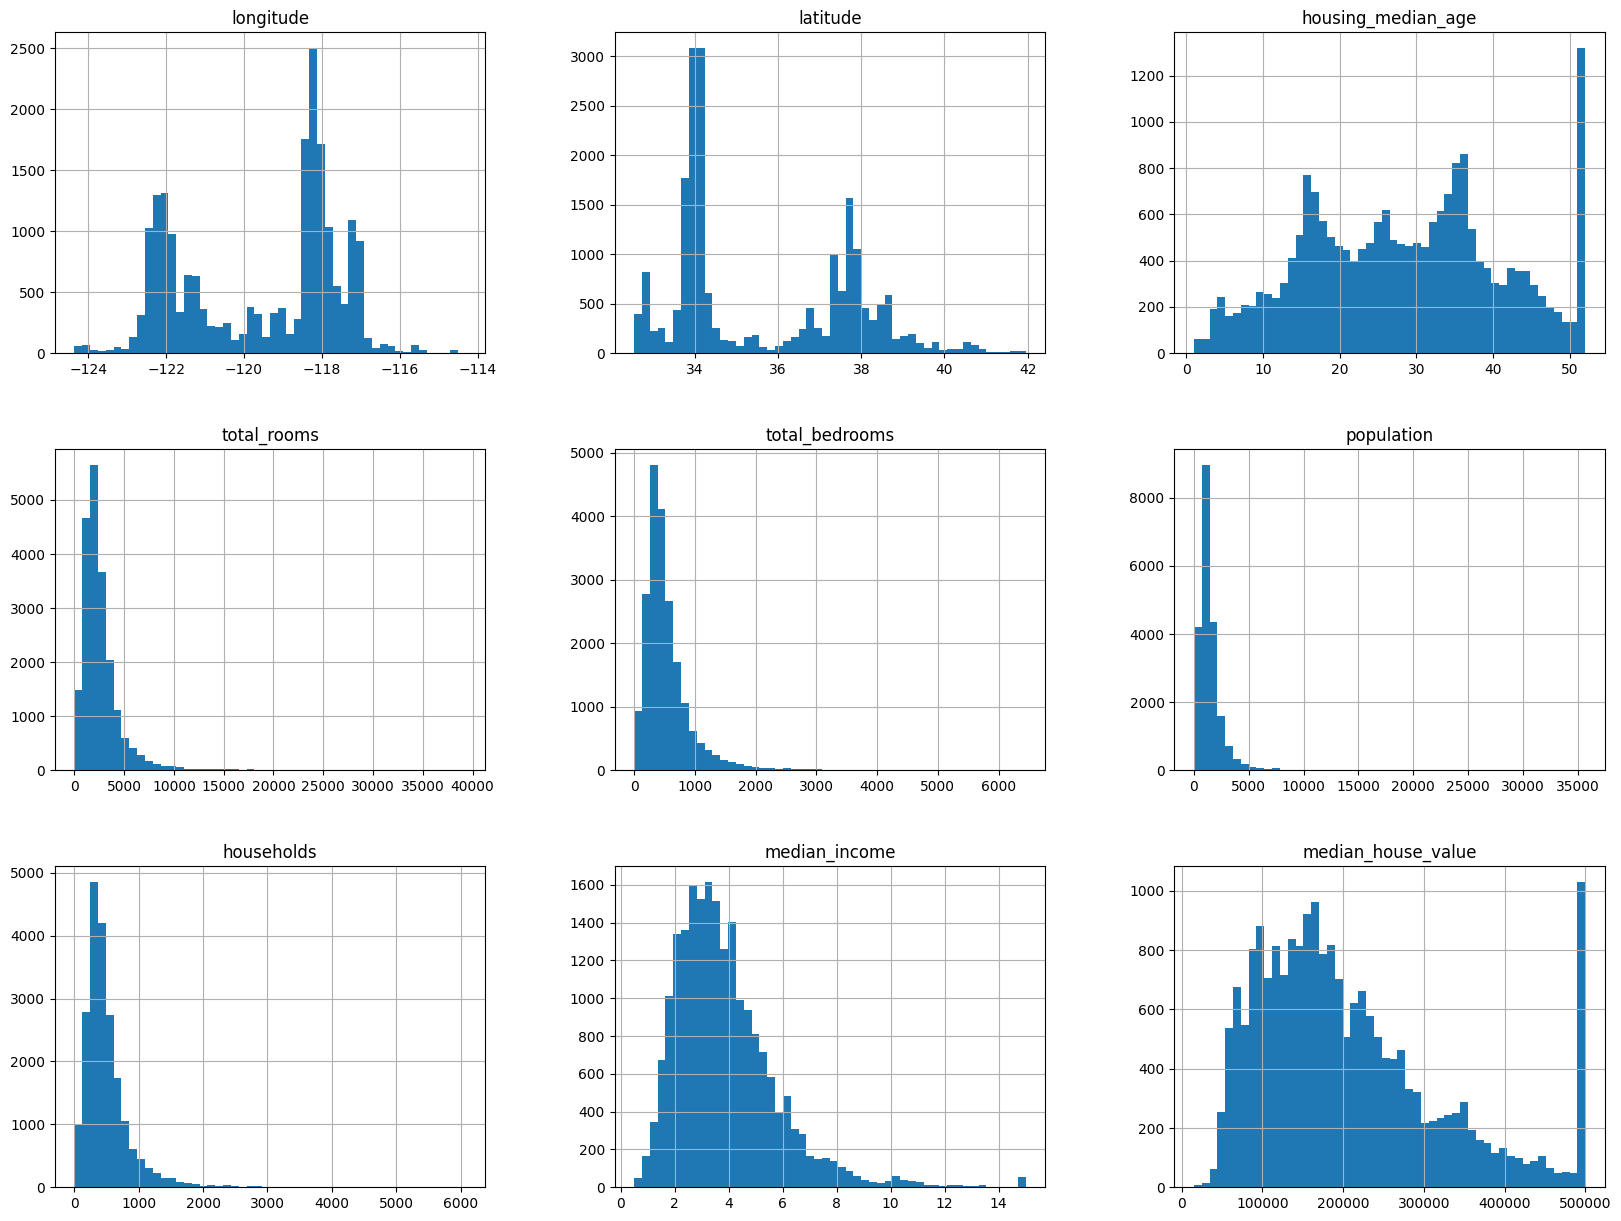

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins =50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np

def split_train_test(data,test_ration):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ration)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]  # Getting the indices of the shuffled set from test_set_size to end of the data 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [14]:
train_set,test_Set=split_train_test(housing, 0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_Set)

4128

In [17]:
train_set , test_set =split_train_test(housing, 0.2)

In [18]:
len(test_set)

4128

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
886,-121.98,37.54,17.0,5133.0,1375.0,3386.0,1339.0,3.1326,220800.0,<1H OCEAN
3263,-122.88,39.14,20.0,1125.0,231.0,521.0,196.0,2.2188,106300.0,INLAND
2349,-119.67,36.80,9.0,3712.0,508.0,1632.0,474.0,6.0110,163100.0,INLAND
20214,-119.25,34.28,36.0,1530.0,341.0,703.0,317.0,3.5819,231900.0,NEAR OCEAN
10069,-120.20,39.33,26.0,1988.0,379.0,905.0,321.0,3.7841,109500.0,INLAND


In [20]:
train_set , test_set = split_train_test(housing, 0.2)

In [21]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,259800.0,NEAR OCEAN
1946,-120.91,38.73,11.0,5460.0,859.0,2645.0,838.0,4.8350,230600.0,INLAND
6278,-117.95,34.02,19.0,1129.0,258.0,900.0,228.0,3.8750,135600.0,<1H OCEAN
4106,-118.36,34.13,36.0,6871.0,1180.0,2216.0,1130.0,8.0499,495600.0,<1H OCEAN
3806,-118.45,34.21,30.0,2331.0,733.0,2172.0,707.0,2.1888,195600.0,<1H OCEAN


In [22]:
import numpy as np
def split_train_test(data, test_ration):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]   # Getting the indices of the shuffled set from 0 to test_set_size 
    train_indices = shuffled_indices[test_set_size:]  # Getting the indices of the shuffled set from test_set_size to end of the data 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [23]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,259800.0,NEAR OCEAN
1946,-120.91,38.73,11.0,5460.0,859.0,2645.0,838.0,4.8350,230600.0,INLAND
6278,-117.95,34.02,19.0,1129.0,258.0,900.0,228.0,3.8750,135600.0,<1H OCEAN
4106,-118.36,34.13,36.0,6871.0,1180.0,2216.0,1130.0,8.0499,495600.0,<1H OCEAN
3806,-118.45,34.21,30.0,2331.0,733.0,2172.0,707.0,2.1888,195600.0,<1H OCEAN


In [24]:
from zlib import crc32
def test_set_check(identifier, test_ration):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ration*2**32
def split_train_test_by_id(data, test_ration, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ration))
    return data.loc[~in_test_set], data.loc[in_test_set] 


In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Unfortunatley our housing data has no unique identifire 
    - One option is to use the inex as an identifier 
        - Make sure that the new data are appended at the end of the file 
        - Make sure that no data are deleted 

In [26]:
housing_with_id = housing.reset_index()

In [27]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [29]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [30]:
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]

In [31]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [32]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [33]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


### Scikit-Learn provides few functions to slpit tje training set and test set. 

In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [35]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


- So far we were looking at the random splitting 
- Consider you pick 1000 people 
    - if you pick randomly there is high chance that you get 500 female and 500 male 
    - if you consider how the population is in US 51.3% female and 48.7% male 
        - best way of pciking the sample is then to pick 513 female and 487 male 
## This way of sampling is called the "stratified sampling" 
    - in here population is devided in to subgroups calles "strata" 

### How this applied to our case? 
    - May be from an expert or may be indepth analysis of data says you that the "median income"is a very importent attribute to predic the "median house pricing"

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                             bins =[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])

<Axes: >

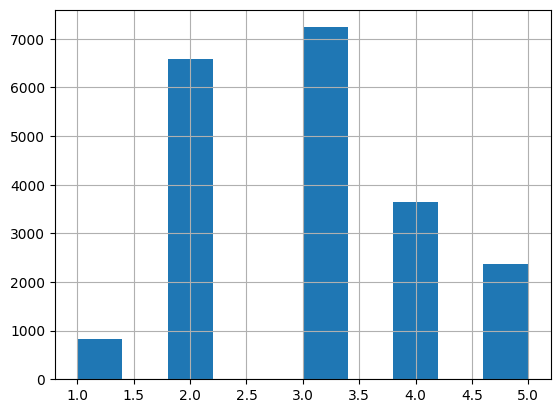

In [37]:
housing["income_cat"].hist()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


#### Stratified sampling based on the income category 

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [40]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

### Let's delete the income_cat from the data so it goes to the origninal state 

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

### Assignment has a good chunck of marks allocated to EDA  
     #### Assignment --> Theory behind the algorithm --> Present the thory properly in your writin ****
     
### Put your test set aside and only use the training set for EDA
        - Take the part of the data set for EDA (Exploration set) if the data set is very large 

In [42]:
housing_tr =strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

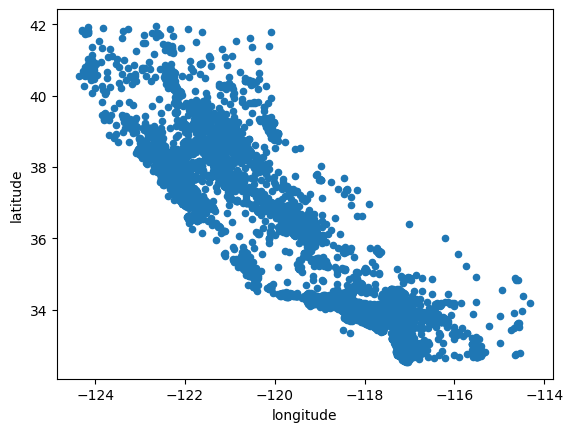

In [43]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

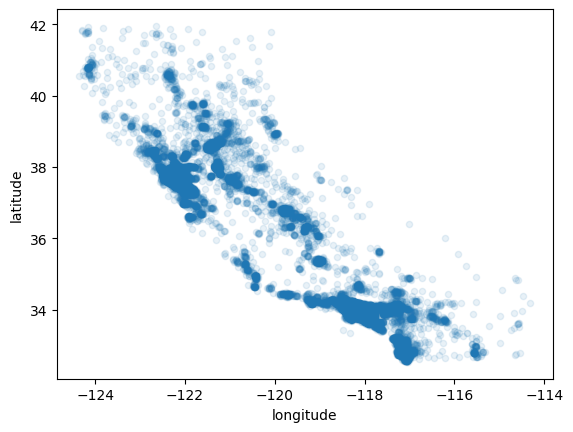

In [44]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

## let's look at the housing price 

<Axes: xlabel='longitude', ylabel='latitude'>

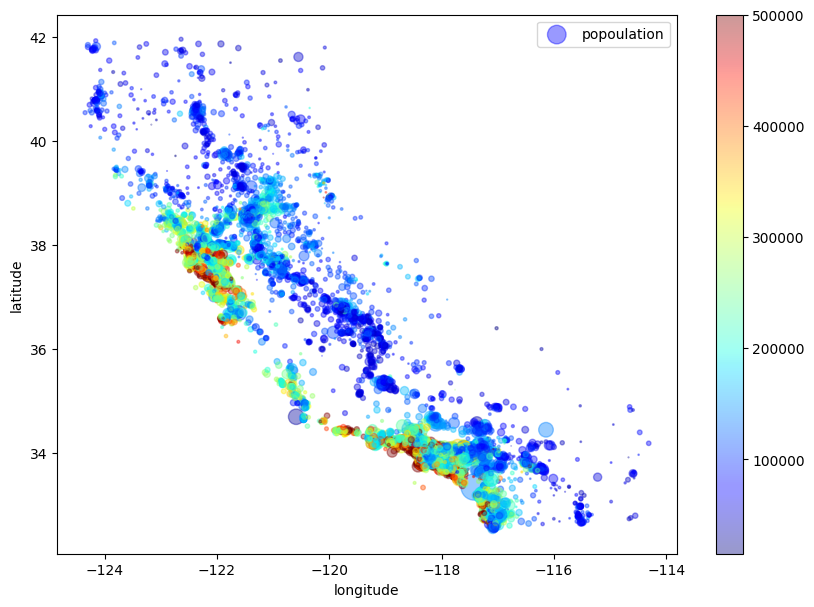

In [45]:
housing_tr.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
               s=housing_tr["population"]/100, label="popoulation" , figsize=(10,7),
               c=housing_tr["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,
               )
             

- Our objective is to predict the housing price 
    - What attributes are importent in doing so 
    - To do that we have to see the "Corrilation" between the other attributes and the median_house_value 
        - Corrielation coefficient only measure the linear relationship 

In [46]:
import pandas as pd

# Identify columns with non-numeric values
non_numeric_columns = housing_tr.select_dtypes(include='object').columns.tolist()

# Remove non-numeric columns
numeric_housing_tr = housing_tr.drop(columns=non_numeric_columns)

# Convert non-numeric values to NaN in the remaining numeric columns
numeric_housing_tr = numeric_housing_tr.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
numeric_housing_tr = numeric_housing_tr.dropna()

# Compute correlation matrix
corr_matrix = numeric_housing_tr.corr()


In [47]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924487,-0.107143,0.050033,0.076686,0.108593,0.064569,-0.020071,-0.047017
latitude,-0.924487,1.000000,0.006611,-0.039998,-0.072550,-0.115419,-0.078661,-0.074975,-0.143079
housing_median_age,-0.107143,0.006611,1.000000,-0.364142,-0.325101,-0.298538,-0.306622,-0.111127,0.114839
total_rooms,0.050033,-0.039998,-0.364142,1.000000,0.929391,0.855363,0.919024,0.200536,0.134415
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108593,-0.115419,-0.298538,0.855363,0.876324,1.000000,0.904630,0.003189,-0.027547
households,0.064569,-0.078661,-0.306622,0.919024,0.980167,0.904630,1.000000,0.011835,0.063741
median_income,-0.020071,-0.074975,-0.111127,0.200536,-0.009643,0.003189,0.011835,1.000000,0.687419
median_house_value,-0.047017,-0.143079,0.114839,0.134415,0.047781,-0.027547,0.063741,0.687419,1.000000


In [48]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687419
total_rooms           0.134415
housing_median_age    0.114839
households            0.063741
total_bedrooms        0.047781
population           -0.027547
longitude            -0.047017
latitude             -0.143079
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='latitude', ylabel='total_rooms'>],
       [<Axes

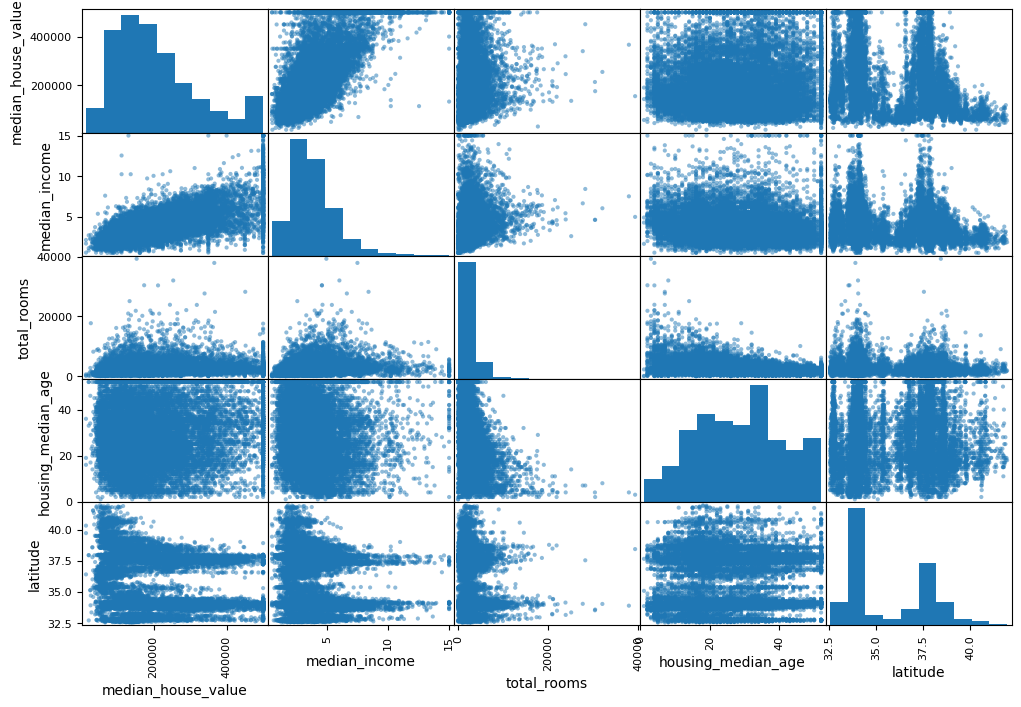

In [49]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age", "latitude"]

scatter_matrix(housing_tr[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

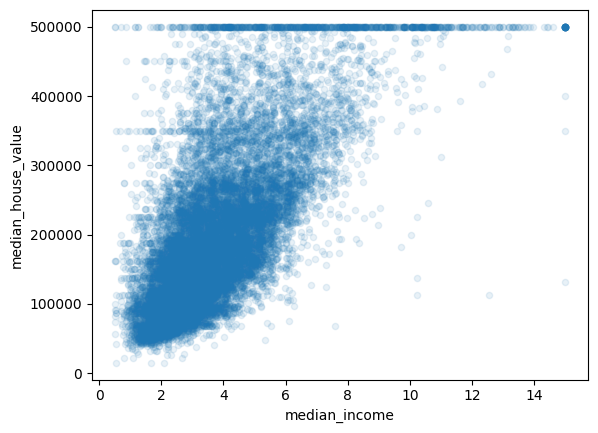

In [50]:
housing_tr.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

- Things to do
    - Remove the data with the 500,000 cap 
    - remove the similar stright lines bellow (450,000    350,000  ----) 

## EDA with combined attributes 

In [51]:
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"]
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"]
housing_tr["population_per_household"] = housing_tr["population"]/housing_tr["households"]

In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [53]:
# Drop non-numeric columns
numeric_housing_tr = housing_tr.drop(columns=["ocean_proximity"])

# Compute correlation matrix
corr_matrix = numeric_housing_tr.corr()

# Sort correlations with median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Building the ML Model 
## Prepaire the data for ML model (Preprocessing)

In [54]:
housing_tr = strat_train_set.copy()

In [55]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [56]:
housing_tr = strat_train_set.drop("median_house_value", axis=1)
housing_tr_labels = strat_train_set["median_house_value"].copy()

In [57]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [58]:
housing_tr_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

# Data Cleaning 

1. Creste some functions to fill the missing data
    -fixing the missing data in total_bedrooms attribute 
        - Get rid of the districks where the data are missing 
        - get rid of the whole attribute 
        - set the missing value to something (ex: zero, the mean, the median, the running average) 

In [59]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housing_num=housing_tr.drop("ocean_proximity" , axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [60]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [63]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [64]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [66]:
X=imputer.transform(housing_num)

In [67]:
X


array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [68]:
housing_num_tr=pd.DataFrame(X, columns=housing_num.columns)

In [69]:
housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [70]:
housing_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [71]:
housing_num_tr.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964
16511,-122.14,39.97,27.0,1079.0,222.0,625.0,197.0,3.1319


In [72]:
housing_num_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Lets working with the categorical attributes


In [73]:
housing_cat=housing_tr[["ocean_proximity"]]

In [74]:
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [75]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


### we are going to use the encorders which we also called as transfomaters


In [76]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encode=ordinal_encoder.fit_transform(housing_cat)

In [77]:
housing_cat_encode[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [80]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [81]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [82]:
housing_cat_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [84]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [85]:
housing_cat_1hot_pd=pd.DataFrame(housing_cat_1hot , columns=housing_cat.columns)

In [86]:
housing_cat_1hot_pd.head()

,ocean_proximity
0,"(0, 1)\t1.0"
1,"(0, 4)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 4)\t1.0"
4,"(0, 0)\t1.0"


In [87]:
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [88]:
housing_cat_1hot_pd.head(10)

,ocean_proximity
0,"(0, 1)\t1.0"
1,"(0, 4)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 4)\t1.0"
4,"(0, 0)\t1.0"
5,"(0, 3)\t1.0"
6,"(0, 0)\t1.0"
7,"(0, 0)\t1.0"
8,"(0, 0)\t1.0"
9,"(0, 0)\t1.0"


# Custom Transformers


In [89]:
## create th custome transformes to  creat and add new features to  the existing data set


In [92]:
from  sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6
class CombinedAtrributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_households= X[:,rooms_ix]/X[:,households_ix]
        population_per_households= X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_rooms= X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_households,population_per_households,bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_households,population_per_households]
            
            

In [93]:
attr_adder=CombinedAtrributeAdder(add_bedrooms_per_room=True)

In [95]:
housing_extra_attribs=attr_adder.transform(housing_tr.values)

In [96]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 5.485835694050992, 3.168555240793201,
        0.20578363026077975],
       [-117.23, 33.09, 7.0, ..., 6.927083333333333, 2.6236979166666665,
        0.16071428571428573],
       [-119.04, 35.37, 44.0, ..., 5.3933333333333335, 2.223333333333333,
        0.1915945611866502],
       ...,
       [-122.72, 38.44, 48.0, ..., 4.1104651162790695,
        2.6627906976744184, 0.2347949080622348],
       [-122.7, 38.31, 14.0, ..., 6.297405189620759, 2.411177644710579,
        0.1838351822503962],
       [-122.14, 39.97, 27.0, ..., 5.477157360406092, 3.1725888324873095,
        0.2057460611677479]], dtype=object)

In [97]:
housing_extra_attribs_pd=pd.DataFrame(housing_extra_attribs)

In [98]:
housing_extra_attribs_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555,0.205784
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698,0.160714
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333,0.191595
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213,0.276505
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241,0.182692


# When it comes to the data pre-processing feature scaling is very important


In [99]:
## Features Scalling
